In [106]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Описание кейса  
---
Гномы достаточно дружные, искренние и доверчивые существа и живут общинами. В каждом поселении есть таверна, в которой разливают вкусный эль и пекут замечательные булочки. Не смотря на все свои светлые качества, гномы достаточно забывчивые и расторопные, поэтому после завершения домашних дел перед ужином в таверне забывают кошелек, а расплачиваются утром на следующий день.

Особо нечестные жители общины могут и вовсе не вернуть деньги заведению, поэтому любители гномьего Машинного Обучения предложили следующую идею: научиться предсказывать, вернет ли забывший дома кошелек гном деньги в течение ближайших дней или, на современном языке, его заказ дефолтнет. Это позволит повысить финансовую стабильность таверны, не исполняя заказы, которые заранее не будут оплачены.

# Задача
---  
Построить алгоритм, определяющий вероятность дефолта того или иного заказа на исторических данных из таверн различных гномьих общин с 2015-02-24 по 2016-09-30.

# Описание данных
---

- **Deal_id** - Номер заказа
- **Deal_date** - Дата заказа
- **First_deal_date** -	Дата первого заказа
- **Secret_dwarf_info_1** -	Засекреченный признак по гному №1
- **Secret_dwarf_info_2** -	Засекреченный признак по гному №2
- **Secret_dwarf_info_3** -	Засекреченный признак по гному №3
- **First_default_date** -	Первая дата дефолта гнома
- **Successful_deals_count** -	Сколько оплаченных заказов было сделано гномом
- **Region** -	Регион таверны
- **Tavern** -	Тип таверны
- **Hashed_deal_detail_1** -	Засекреченный признак по заказу №1
- **Hashed_deal_detail_2** -	Засекреченный признак по заказу №2
- **Hashed_deal_detail_3** -	Засекреченный признак по заказу №3
- **Hashed_deal_detail_4** -	Засекреченный признак по заказу №4
- **Hashed_deal_detail_5** -	Засекреченный признак по заказу №5
- **Hashed_deal_detail_6** -	Засекреченный признак по заказу №6
- **Age** -	Возраст гнома, сделавшего заказ
- **Gender** -	Пол гнома, сделавшего заказ
- **Default** -	Дефолтнул ли по этой покупке гном? 1 - да, 0 - нет.
  
# Результат
---
В качестве решения
ожидается файл prediction формата csv, с предсказаниями для тестовых не размечанных данных. 
Он должен содержать две колонки - Deal_id и Prediction, где первая колонка означает уникальный идентификатор заказа, а вторая - вероятность того, что заказавший не вернет деньги.

- Deal_id |	Prediction
- 22487461|	1
- 62494261|	0.93
- 34822849|	0.07
- 46893387|	0.34
- 67128275|  0.568

 покупке гном? 1 - да, 0 - нет.

## Знакомство с данными 

In [107]:
data_train = pd.read_csv("data/train.csv")
data_train.head()

Deal_id   Deal_date First_deal_date  Secret_dwarf_info_1  \
0  22487461  2015-11-05      2015-08-29                  NaN   
1  62494261  2016-08-26      2015-12-21                  3.5   
2  34822849  2016-02-18      2015-11-11                  NaN   
3  46893387  2016-04-30      2016-03-22                  NaN   
4  67128275  2016-09-19      2016-07-21                  NaN   

   Secret_dwarf_info_2  Secret_dwarf_info_3 First_default_date  \
0                  NaN                  NaN                NaN   
1                 -2.0                  5.0         2016-07-30   
2                  NaN                  NaN                NaN   
3                  NaN                  NaN                NaN   
4                  NaN                  NaN                NaN   

   Successful_deals_count             Region  Tavern  Hashed_deal_detail_1  \
0                     0.0  Tavern_district_3       7                   2.5   
1                     2.0  Tavern_district_4       7                   2.5   
2                     0.0  Tavern_district_6       7                   2.5   
3                     0.0  Tavern_district_2      13                   2.5   
4                     0.0  Tavern_district_4      39                   2.5   

   Hashed_deal_detail_2  Hashed_deal_detail_3  Hashed_deal_detail_4  \
0                    -3                     8                   2.5   
1                    -3                    14                   3.5   
2                    -3                     8                   2.5   
3                    -2                     5                   2.5   
4                    -3                     7                   2.5   

   Hashed_deal_detail_5  Hashed_deal_detail_6   Age  Gender  Default  
0                    -3                     5  36.0    Male        0  
1                    -3                     5  29.0  Female        1  
2                    -3                     5  56.0  Female        0  
3                    -3                     5  27.0  Female        0  
4                    -3                     5  37.0  Female        0

In [108]:
data_train.Default.value_counts()

Default
0    2817
1     351
Name: count, dtype: int64

In [109]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Secret_dwarf_info_1     535 non-null    float64
 4   Secret_dwarf_info_2     535 non-null    float64
 5   Secret_dwarf_info_3     535 non-null    float64
 6   First_default_date      535 non-null    object 
 7   Successful_deals_count  3154 non-null   float64
 8   Region                  3161 non-null   object 
 9   Tavern                  3168 non-null   int64  
 10  Hashed_deal_detail_1    3168 non-null   float64
 11  Hashed_deal_detail_2    3168 non-null   int64  
 12  Hashed_deal_detail_3    3168 non-null   int64  
 13  Hashed_deal_detail_4    3168 non-null   float64
 14  Hashed_deal_detail_5    3168 non-null   

In [110]:
data_train.isna().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_dwarf_info_1       2633
Secret_dwarf_info_2       2633
Secret_dwarf_info_3       2633
First_default_date        2633
Successful_deals_count      14
Region                       7
Tavern                       0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Hashed_deal_detail_6         0
Age                          0
Gender                       0
Default                      0
dtype: int64

In [111]:
data_train.describe() 

Deal_id  Secret_dwarf_info_1  Secret_dwarf_info_2  \
count  3.168000e+03           535.000000           535.000000   
mean   4.605727e+07             3.935514            -2.299065   
std    5.370953e+07             0.888467             0.734579   
min    5.856790e+05             2.500000            -3.000000   
25%    2.761608e+07             3.500000            -3.000000   
50%    4.349426e+07             3.500000            -2.000000   
75%    5.778544e+07             4.500000            -2.000000   
max    6.927701e+08             9.500000             2.000000   

       Secret_dwarf_info_3  Successful_deals_count       Tavern  \
count           535.000000             3154.000000  3168.000000   
mean              5.267290                1.043754    13.350694   
std               0.498645                1.649416     8.851891   
min               5.000000                0.000000     2.000000   
25%               5.000000                0.000000     7.000000   
50%               5.000000                0.000000     8.000000   
75%               5.000000                2.000000    15.000000   
max               8.000000               17.000000    58.000000   

       Hashed_deal_detail_1  Hashed_deal_detail_2  Hashed_deal_detail_3  \
count           3168.000000           3168.000000           3168.000000   
mean               2.518939             -2.404356              8.462437   
std                0.351308              2.474564              3.521127   
min                2.500000             -3.000000              5.000000   
25%                2.500000             -3.000000              6.000000   
50%                2.500000             -3.000000              8.000000   
75%                2.500000             -3.000000             10.000000   
max               17.500000             78.000000             29.000000   

       Hashed_deal_detail_4  Hashed_deal_detail_5  Hashed_deal_detail_6  \
count           3168.000000           3168.000000                3168.0   
mean               3.193813             -2.981692                   5.0   
std                2.048743              0.245540                   0.0   
min                2.500000             -3.000000                   5.0   
25%                2.500000             -3.000000                   5.0   
50%                2.500000             -3.000000                   5.0   
75%                2.500000             -3.000000                   5.0   
max               37.500000              4.000000                   5.0   

               Age      Default  
count  3168.000000  3168.000000  
mean     36.411616     0.110795  
std      10.821444     0.313928  
min      20.000000     0.000000  
25%      28.000000     0.000000  
50%      34.000000     0.000000  
75%      43.000000     0.000000  
max      72.000000     1.000000

## Обработаем пропущенные значения числовых признаков

<Axes: xlabel='Successful_deals_count', ylabel='Count'>

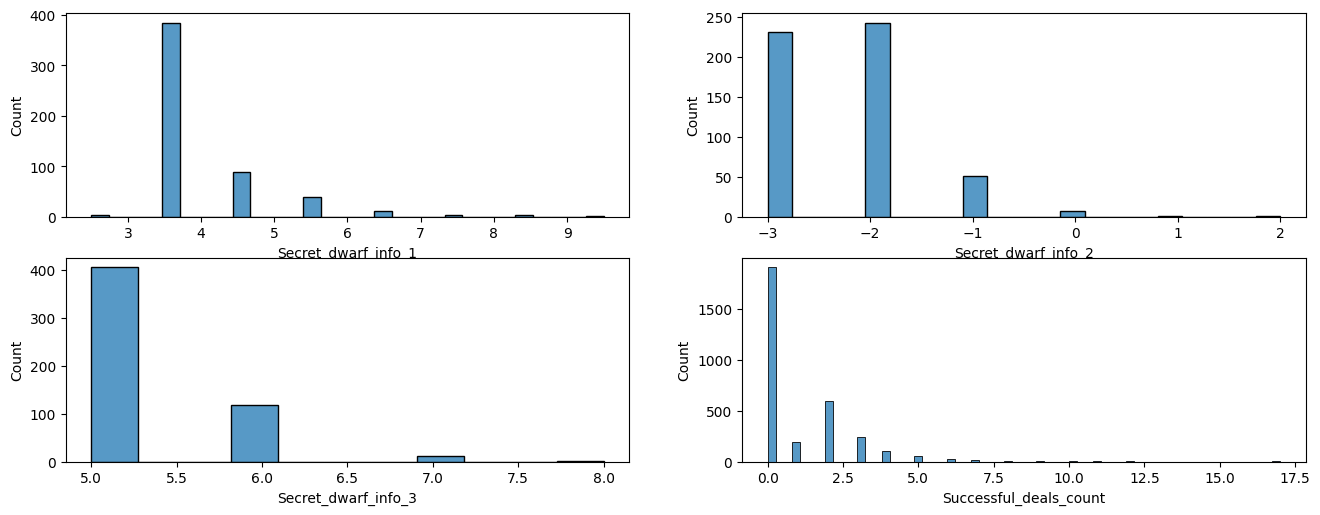

In [112]:
fig = plt.figure()
fig.set_size_inches(16,9)

ax1 = fig.add_subplot(3,2,1)
sns.histplot(data_train["Secret_dwarf_info_1"])

ax2 = fig.add_subplot(3,2,2)
sns.histplot(data_train["Secret_dwarf_info_2"])

ax3 = fig.add_subplot(3,2,3)
sns.histplot(data_train["Secret_dwarf_info_3"])

ax4 = fig.add_subplot(3,2,4)
sns.histplot(data_train["Successful_deals_count"])

In [113]:
data_train["First_default_date"]

0              NaN
1       2016-07-30
2              NaN
3              NaN
4              NaN
           ...    
3163           NaN
3164           NaN
3165           NaN
3166           NaN
3167           NaN
Name: First_default_date, Length: 3168, dtype: object

In [114]:
data_train["Region"].value_counts()

Region
Tavern_district_3    1204
Tavern_district_6     478
Tavern_district_2     448
Tavern_district_4     364
Tavern_district_1     240
Tavern_district_0     213
Tavern_district_5     160
Tavern_district_7      54
Name: count, dtype: int64

In [115]:
# На основе проведенного анализа заменим пропущенные значения на моды и медианы
Secret_dwarf_info_1_mode = data_train["Secret_dwarf_info_1"].mode()[0]
data_train["Secret_dwarf_info_1"] = data_train["Secret_dwarf_info_1"].fillna(Secret_dwarf_info_1_mode)

Secret_dwarf_info_2 = data_train["Secret_dwarf_info_2"].median()
data_train["Secret_dwarf_info_2"] = data_train["Secret_dwarf_info_2"].fillna(Secret_dwarf_info_2)

Secret_dwarf_info_3 = data_train["Secret_dwarf_info_3"].mode()[0]
data_train["Secret_dwarf_info_3"] = data_train["Secret_dwarf_info_3"].fillna(Secret_dwarf_info_3)

Successful_deals_count = data_train["Successful_deals_count"].median()
data_train["Successful_deals_count"] = data_train["Successful_deals_count"].fillna(Successful_deals_count)

In [116]:
data_train_clear = data_train.copy()

In [117]:
data_train_clear.isna().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_dwarf_info_1          0
Secret_dwarf_info_2          0
Secret_dwarf_info_3          0
First_default_date        2633
Successful_deals_count       0
Region                       7
Tavern                       0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Hashed_deal_detail_6         0
Age                          0
Gender                       0
Default                      0
dtype: int64

## Посмотрим на сколько признаки коррелируют друг с другом и посмотрим на их вариативность

In [118]:
data_train_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Secret_dwarf_info_1     3168 non-null   float64
 4   Secret_dwarf_info_2     3168 non-null   float64
 5   Secret_dwarf_info_3     3168 non-null   float64
 6   First_default_date      535 non-null    object 
 7   Successful_deals_count  3168 non-null   float64
 8   Region                  3161 non-null   object 
 9   Tavern                  3168 non-null   int64  
 10  Hashed_deal_detail_1    3168 non-null   float64
 11  Hashed_deal_detail_2    3168 non-null   int64  
 12  Hashed_deal_detail_3    3168 non-null   int64  
 13  Hashed_deal_detail_4    3168 non-null   float64
 14  Hashed_deal_detail_5    3168 non-null   

In [119]:
variances = data_train_clear.var(numeric_only=True)
variances<0.01

Deal_id                   False
Secret_dwarf_info_1       False
Secret_dwarf_info_2       False
Secret_dwarf_info_3       False
Successful_deals_count    False
Tavern                    False
Hashed_deal_detail_1      False
Hashed_deal_detail_2      False
Hashed_deal_detail_3      False
Hashed_deal_detail_4      False
Hashed_deal_detail_5      False
Hashed_deal_detail_6       True
Age                       False
Default                   False
dtype: bool

In [120]:
data_train_clear = data_train_clear.drop("Hashed_deal_detail_6", axis=1) # удалим данный признак на основе его вариативности 

In [121]:
corr_mat = data_train_clear.corr(numeric_only=True)
corr_mat

Deal_id  Secret_dwarf_info_1  Secret_dwarf_info_2  \
Deal_id                 1.000000            -0.008053            -0.012988   
Secret_dwarf_info_1    -0.008053             1.000000             0.222860   
Secret_dwarf_info_2    -0.012988             0.222860             1.000000   
Secret_dwarf_info_3    -0.012297             0.324020             0.289392   
Successful_deals_count  0.034533             0.097787            -0.030225   
Tavern                 -0.035775            -0.020235            -0.017503   
Hashed_deal_detail_1   -0.005323            -0.000929             0.005671   
Hashed_deal_detail_2    0.003426             0.036146            -0.048258   
Hashed_deal_detail_3    0.062462             0.139170            -0.023134   
Hashed_deal_detail_4    0.031422             0.026740            -0.007659   
Hashed_deal_detail_5    0.000357            -0.000855             0.011707   
Age                    -0.004068            -0.074827             0.026828   
Default                -0.008057             0.093582            -0.000852   

                        Secret_dwarf_info_3  Successful_deals_count    Tavern  \
Deal_id                           -0.012297                0.034533 -0.035775   
Secret_dwarf_info_1                0.324020                0.097787 -0.020235   
Secret_dwarf_info_2                0.289392               -0.030225 -0.017503   
Secret_dwarf_info_3                1.000000                0.049956 -0.002058   
Successful_deals_count             0.049956                1.000000  0.012744   
Tavern                            -0.002058                0.012744  1.000000   
Hashed_deal_detail_1              -0.002793                0.059831  0.026700   
Hashed_deal_detail_2               0.033489                0.193516  0.083178   
Hashed_deal_detail_3               0.078239                0.500938 -0.109438   
Hashed_deal_detail_4               0.027577                0.195267  0.090768   
Hashed_deal_detail_5              -0.009129                0.013841  0.013752   
Age                               -0.059891               -0.013020 -0.025327   
Default                            0.097769               -0.079221 -0.030804   

                        Hashed_deal_detail_1  Hashed_deal_detail_2  \
Deal_id                            -0.005323              0.003426   
Secret_dwarf_info_1                -0.000929              0.036146   
Secret_dwarf_info_2                 0.005671             -0.048258   
Secret_dwarf_info_3                -0.002793              0.033489   
Successful_deals_count              0.059831              0.193516   
Tavern                              0.026700              0.083178   
Hashed_deal_detail_1                1.000000              0.013171   
Hashed_deal_detail_2                0.013171              1.000000   
Hashed_deal_detail_3               -0.013719             -0.147369   
Hashed_deal_detail_4               -0.003347             -0.022062   
Hashed_deal_detail_5               -0.004021              0.060517   
Age                                 0.002185             -0.032211   
Default                             0.023913             -0.016287   

                        Hashed_deal_detail_3  Hashed_deal_detail_4  \
Deal_id                             0.062462              0.031422   
Secret_dwarf_info_1                 0.139170              0.026740   
Secret_dwarf_info_2                -0.023134             -0.007659   
Secret_dwarf_info_3                 0.078239              0.027577   
Successful_deals_count              0.500938              0.195267   
Tavern                             -0.109438              0.090768   
Hashed_deal_detail_1               -0.013719             -0.003347   
Hashed_deal_detail_2               -0.147369             -0.022062   
Hashed_deal_detail_3                1.000000             -0.247673   
Hashed_deal_detail_4               -0.247673              1.000000   
Hashed_deal_detail_5               -0.054352  

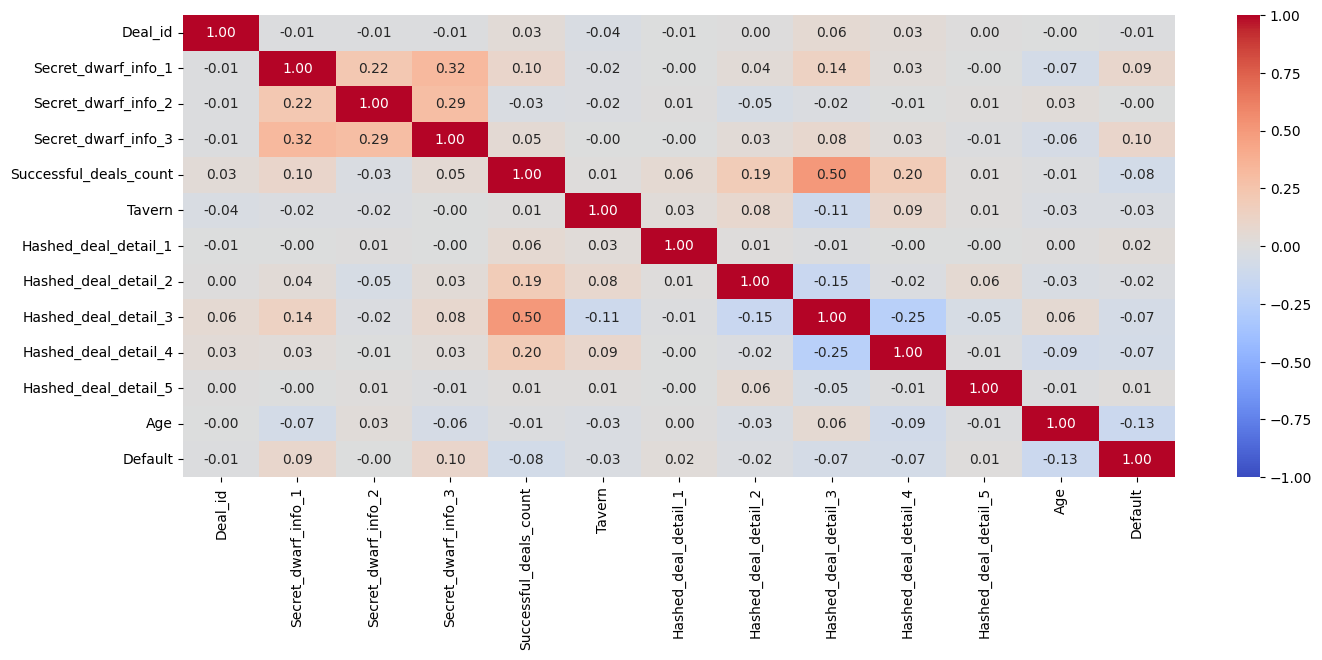

In [122]:
fig = plt.figure()
fig.set_size_inches(16,6)

sns.heatmap(corr_mat,
            annot=True,
            fmt = ".2f",
            vmin=-1,
            vmax=1,
            cmap="coolwarm")
plt.show()

## Обработаем категориальные признаки 

In [123]:
#переведем временные признаки в соотвествующий тип данных
data_train_clear['Deal_date'] = pd.to_datetime(data_train_clear['Deal_date'])
data_train_clear['First_deal_date'] = pd.to_datetime(data_train_clear['First_deal_date'])
data_train_clear["First_default_date"] = pd.to_datetime(data_train_clear["First_default_date"])

In [124]:
data_train_clear["was_default"] = data_train_clear['First_default_date'].isna().astype(int)
data_train_clear['First_default_date'] = data_train_clear['First_default_date'].fillna(pd.Timestamp("1970-01-01"))
data_train_clear['my_feature_1'] = (data_train_clear['Deal_date'] - data_train_clear['First_deal_date']).dt.days

In [125]:
data_train_clear["Deal_date_year"] = data_train_clear.Deal_date.dt.year
data_train_clear["Deal_date_month"] = data_train_clear.Deal_date.dt.month
data_train_clear["Deal_date_day"] = data_train_clear.Deal_date.dt.day

data_train_clear["First_deal_date_year"] = data_train_clear.First_deal_date.dt.year
data_train_clear["First_deal_date_month"] = data_train_clear.First_deal_date.dt.month
data_train_clear["First_deal_date_day"] = data_train_clear.First_deal_date.dt.day

data_train_clear["First_default_date_year"] = data_train_clear.First_default_date.dt.year
data_train_clear["First_default_date_month"] = data_train_clear.First_default_date.dt.month
data_train_clear["First_default_date_day"] = data_train_clear.First_default_date.dt.day

data_train_clear = data_train_clear.drop(["Deal_date", "First_deal_date", "First_default_date"], axis=1)
data_train_clear.head()

Deal_id  Secret_dwarf_info_1  Secret_dwarf_info_2  Secret_dwarf_info_3  \
0  22487461                  3.5                 -2.0                  5.0   
1  62494261                  3.5                 -2.0                  5.0   
2  34822849                  3.5                 -2.0                  5.0   
3  46893387                  3.5                 -2.0                  5.0   
4  67128275                  3.5                 -2.0                  5.0   

   Successful_deals_count             Region  Tavern  Hashed_deal_detail_1  \
0                     0.0  Tavern_district_3       7                   2.5   
1                     2.0  Tavern_district_4       7                   2.5   
2                     0.0  Tavern_district_6       7                   2.5   
3                     0.0  Tavern_district_2      13                   2.5   
4                     0.0  Tavern_district_4      39                   2.5   

   Hashed_deal_detail_2  Hashed_deal_detail_3  ...  my_feature_1  \
0                    -3                     8  ...            68   
1                    -3                    14  ...           249   
2                    -3                     8  ...            99   
3                    -2                     5  ...            39   
4                    -3                     7  ...            60   

   Deal_date_year  Deal_date_month Deal_date_day  First_deal_date_year  \
0            2015               11             5                  2015   
1            2016                8            26                  2015   
2            2016                2            18                  2015   
3            2016                4            30                  2016   
4            2016                9            19                  2016   

   First_deal_date_month  First_deal_date_day  First_default_date_year  \
0                      8                   29                     1970   
1                     12                   21                     2016   
2                     11                   11                     1970   
3                      3                   22                     1970   
4                      7                   21                     1970   

   First_default_date_month  First_default_date_day  
0                         1                       1  
1                         7                      30  
2                         1                       1  
3                         1                       1  
4                         1                       1  

[5 rows x 26 columns]

In [126]:
data_train_clear = data_train_clear.dropna()

In [127]:
data_train_clear.isna().sum() #убедимся что после обработки данных у нас не осталось пропущенных значений

Deal_id                     0
Secret_dwarf_info_1         0
Secret_dwarf_info_2         0
Secret_dwarf_info_3         0
Successful_deals_count      0
Region                      0
Tavern                      0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Age                         0
Gender                      0
Default                     0
was_default                 0
my_feature_1                0
Deal_date_year              0
Deal_date_month             0
Deal_date_day               0
First_deal_date_year        0
First_deal_date_month       0
First_deal_date_day         0
First_default_date_year     0
First_default_date_month    0
First_default_date_day      0
dtype: int64

In [128]:
from sklearn.model_selection import train_test_split

# Разделение данных с сохранением пропорции классов, ввиду дизбаланса данных.
data_train, data_val = train_test_split(
    data_train_clear, 
    test_size=0.2, 
    shuffle=True  # Столбец с метками классов
)


In [129]:
data_train.Default.value_counts()

Default
0    2249
1     279
Name: count, dtype: int64

In [130]:
data_val.Default.value_counts()

Default
0    563
1     70
Name: count, dtype: int64

In [131]:
import numpy as np
import pandas as pd

# Определяем категориальные и числовые признаки
cat_cols = data_train.loc[:, data_train.dtypes == "object"].columns
num_cols = data_train.loc[:, data_train.dtypes != "object"].columns

for col in cat_cols:
    if data_train[col].nunique() < 10:
        # One-Hot Encoding для категорий с небольшим количеством уникальных значений
        one_hot_train = pd.get_dummies(data_train[col], prefix=col, drop_first=True)
        data_train = pd.concat((data_train.drop(col, axis=1), one_hot_train), axis=1)

        one_hot_val = pd.get_dummies(data_val[col], prefix=col, drop_first=True)
        data_val = pd.concat((data_val.drop(col, axis=1), one_hot_val), axis=1)
    else:
        # Mean Target Encoding
        target_mean = data_train.groupby(col)['Default'].mean()
        target_std = data_train.groupby(col)['Default'].std()

        # Кодируем обучающую выборку с добавлением шума
        noise_scale = 0.01
        data_train[col] = data_train[col].map(lambda x: 
            target_mean.get(x, 0) + np.random.normal(0, noise_scale * target_std.get(x, 0))
        )

        # Кодируем валидационную выборку без добавления шума
        data_val[col] = data_val[col].map(lambda x: target_mean.get(x, 0))

## Кластеризация 


In [132]:
X_train, y_train = data_train.drop(["Default", "Deal_id"], axis=1), data_train["Default"]
X_val, y_val = data_val.drop(["Default", "Deal_id"], axis=1), data_val["Default"]

In [133]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Подготовка данных (нормализация, если требуется)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Обучение DBSCAN
dbscan = DBSCAN(eps=4, min_samples=4)  # eps и min_samples — гиперпараметры, подбирайте их
dbscan.fit(X_train_scaled)

# Получение меток кластеров
labels = dbscan.labels_  # -1 — это "шум", не принадлежащий ни одному кластеру

# Применение к валидационным данным
labels_val = dbscan.fit_predict(X_val_scaled)

# Анализ результатов
print("Количество кластеров:", len(set(labels)) - (1 if -1 in labels else 0))
print("Количество шумовых точек:", sum(labels == -1))



Количество кластеров: 8
Количество шумовых точек: 282


In [134]:
X_train["labels"] = labels
X_val["labels"] =  labels_val

In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 549 to 512
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Secret_dwarf_info_1       2528 non-null   float64
 1   Secret_dwarf_info_2       2528 non-null   float64
 2   Secret_dwarf_info_3       2528 non-null   float64
 3   Successful_deals_count    2528 non-null   float64
 4   Tavern                    2528 non-null   int64  
 5   Hashed_deal_detail_1      2528 non-null   float64
 6   Hashed_deal_detail_2      2528 non-null   int64  
 7   Hashed_deal_detail_3      2528 non-null   int64  
 8   Hashed_deal_detail_4      2528 non-null   float64
 9   Hashed_deal_detail_5      2528 non-null   int64  
 10  Age                       2528 non-null   float64
 11  was_default               2528 non-null   int32  
 12  my_feature_1              2528 non-null   int64  
 13  Deal_date_year            2528 non-null   int32  
 14  Deal_date_mo

## Обучение модели

### Knn

In [136]:
#построим бэйзлайн
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


pipeline_baseline = Pipeline([("scalar", StandardScaler()),
                              ("knn", KNeighborsClassifier())])


pipeline_baseline.fit(X_train, y_train)


Pipeline(steps=[('scalar', StandardScaler()), ('knn', KNeighborsClassifier())])

C:\Anaconda\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


0.6078533367165694

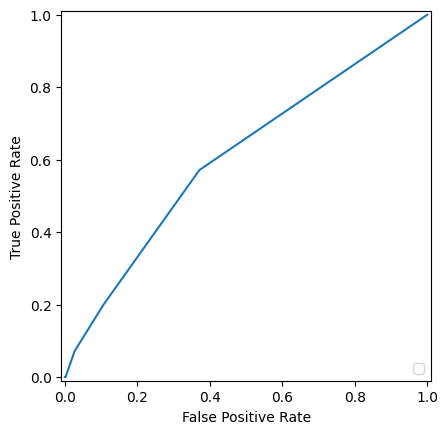

In [137]:
# Получим всевозможные пары FPR, TPR 

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, pipeline_baseline.predict_proba(X_val)[:, 1])

# И нарисуем ROC-кривую

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Посчитаем ROC-AUC

from sklearn.metrics import auc

auc(fpr, tpr)

In [138]:
from sklearn.model_selection import GridSearchCV

def gaussian_kernel(distances, h=10):
        return np.exp(- distances**2 / h**2)

parameters_grid = {
    'knn__n_neighbors': [5, 10, 20],
    'knn__weights': ['uniform', 'distance', gaussian_kernel],
    'knn__p': (2, 1),
}



search_baseline = GridSearchCV(
    pipeline_baseline,
    parameters_grid,
    scoring="roc_auc",
    cv=3,
    verbose=10,
    return_train_score=True
)

search_baseline.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START knn__n_neighbors=5, knn__p=2, knn__weights=uniform.........
[CV 1/3; 1/18] END knn__n_neighbors=5, knn__p=2, knn__weights=uniform;, score=(train=0.884, test=0.600) total time=   0.0s
[CV 2/3; 1/18] START knn__n_neighbors=5, knn__p=2, knn__weights=uniform.........
[CV 2/3; 1/18] END knn__n_neighbors=5, knn__p=2, knn__weights=uniform;, score=(train=0.891, test=0.581) total time=   0.0s
[CV 3/3; 1/18] START knn__n_neighbors=5, knn__p=2, knn__weights=uniform.........
[CV 3/3; 1/18] END knn__n_neighbors=5, knn__p=2, knn__weights=uniform;, score=(train=0.901, test=0.573) total time=   0.0s
[CV 1/3; 2/18] START knn__n_neighbors=5, knn__p=2, knn__weights=distance........
[CV 1/3; 2/18] END knn__n_neighbors=5, knn__p=2, knn__weights=distance;, score=(train=1.000, test=0.603) total time=   0.0s
[CV 2/3; 2/18] START knn__n_neighbors=5, knn__p=2, knn__weights=distance........
[CV 2/3; 2/18] END knn__n_neighbors=5, kn

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [5, 10, 20], 'knn__p': (2, 1),
                         'knn__weights': ['uniform', 'distance',
                                          <function gaussian_kernel at 0x000001BB01282480>]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [139]:
print(f"Best parameter (CV score={search_baseline.best_score_:.5f}):")
print(search_baseline.best_params_)

Best parameter (CV score=0.65781):
{'knn__n_neighbors': 20, 'knn__p': 1, 'knn__weights': 'distance'}


### SVC, Catboost, Random Forest, LightGBM 


In [140]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

pipeline_svm = Pipeline([("scalar", MinMaxScaler()),
                         ("svc", SVC(probability=True))])

pipeline_cb = Pipeline([("scalar", MinMaxScaler()),
                        ("cb", CatBoostClassifier())])

pipeline_rf = Pipeline([("scalar", MinMaxScaler()),
                       ("rf", RandomForestClassifier())])

pipeline_lgb = Pipeline([('scaler', StandardScaler()),  
                         ('lgb', lgb.LGBMClassifier(random_state=42))])


C:\Anaconda\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


0.6451408272012179

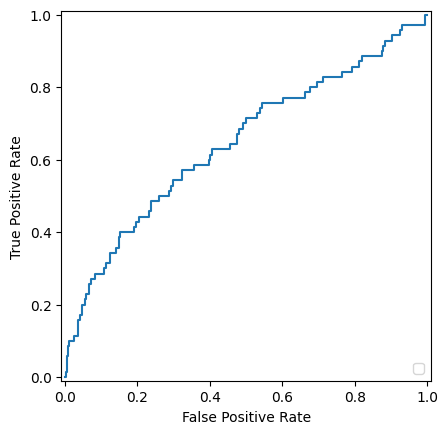

In [141]:
svm_parameters_grid = {
    'svc__C': [1, 0.5, 3],
    'svc__kernel': ['linear', 'rbf', 'sigmoid']
}

search_svm = GridSearchCV(
    pipeline_svm,
    svm_parameters_grid,
    scoring="roc_auc",
    cv=3,
    return_train_score=True
)

search_svm.fit(X_train, y_train)

pipeline_svm.set_params(**search_svm.best_params_)

pipeline_svm.fit(X_train,y_train)

# Получим всевозможные пары FPR, TPR 

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, pipeline_svm.predict_proba(X_val)[:, 1])

# И нарисуем ROC-кривую

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Посчитаем ROC-AUC

from sklearn.metrics import auc

auc(fpr, tpr)

Best parameter (CV score=0.73908):
{'rf__max_depth': 5, 'rf__n_estimators': 300}
ROC-AUC = 0.768891144379599
Оптимальный threshold = 0.13516685920865404


C:\Anaconda\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


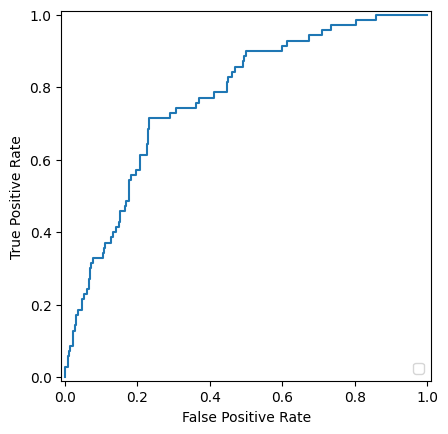

In [142]:
rf_parameters_grid = {
    'rf__n_estimators': [25, 50, 100, 200, 300],
    'rf__max_depth': [2, 5, 15, 30, None]
}
search_rf = GridSearchCV(
    pipeline_rf,
    rf_parameters_grid,
    scoring="roc_auc",
    cv=3,
    return_train_score=True
)

search_rf.fit(X_train, y_train)

print(f"Best parameter (CV score={search_rf.best_score_:.5f}):")
print(search_rf.best_params_)

pipeline_rf.set_params(**search_rf.best_params_)

pipeline_rf.fit(X_train, y_train)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, pipeline_rf.predict_proba(X_val)[:, 1])

# И нарисуем ROC-кривую

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Посчитаем ROC-AUC

from sklearn.metrics import auc

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_rf = thresholds[optimal_idx]
print(f"ROC-AUC = {auc(fpr, tpr)}")
print(f"Оптимальный threshold = {optimal_threshold_rf}")

0:	learn: 0.6922979	total: 1.75ms	remaining: 522ms
1:	learn: 0.6914544	total: 3.48ms	remaining: 518ms
2:	learn: 0.6906010	total: 5.08ms	remaining: 503ms
3:	learn: 0.6896477	total: 6.62ms	remaining: 490ms
4:	learn: 0.6887777	total: 8.15ms	remaining: 481ms
5:	learn: 0.6879213	total: 9.69ms	remaining: 475ms
6:	learn: 0.6870579	total: 11.3ms	remaining: 472ms
7:	learn: 0.6861957	total: 12.8ms	remaining: 468ms
8:	learn: 0.6852932	total: 14.4ms	remaining: 464ms
9:	learn: 0.6844086	total: 15.9ms	remaining: 460ms
10:	learn: 0.6835525	total: 17.4ms	remaining: 458ms
11:	learn: 0.6827029	total: 19ms	remaining: 455ms
12:	learn: 0.6818108	total: 20.5ms	remaining: 452ms
13:	learn: 0.6809617	total: 22ms	remaining: 449ms
14:	learn: 0.6800330	total: 23.5ms	remaining: 447ms
15:	learn: 0.6792075	total: 25ms	remaining: 444ms
16:	learn: 0.6783788	total: 26.5ms	remaining: 442ms
17:	learn: 0.6775364	total: 28ms	remaining: 439ms
18:	learn: 0.6765658	total: 29.6ms	remaining: 438ms
19:	learn: 0.6757507	total: 31

C:\Anaconda\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


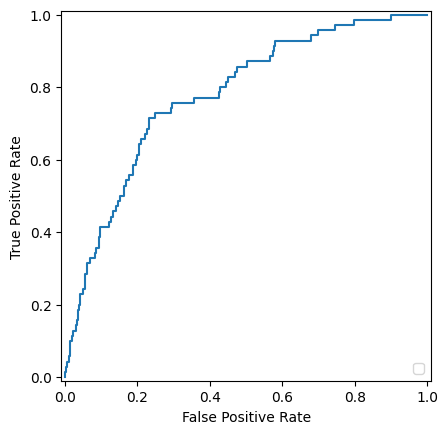

In [143]:
cb_param_grid = {"cb__iterations" : [300],
                 "cb__learning_rate": [0.001, 0.01],
                 "cb__depth": [5, 10], 
                 "cb__l2_leaf_reg": [3, 5]}

search_cb = GridSearchCV(
    pipeline_cb,
    cb_param_grid,
    scoring="roc_auc",
    cv=5,
    return_train_score=True
)

# Обучение GridSearchCV
search_cb.fit(X_train, y_train)

print(f"Best parameter (CV score={search_cb.best_score_:.5f}):")
print(search_cb.best_params_)

# Получение лучшего пайплайна
best_pipeline = search_cb.best_estimator_

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, best_pipeline.predict_proba(X_val)[:, 1])

# И нарисуем ROC-кривую

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Посчитаем ROC-AUC

from sklearn.metrics import auc
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_cb = thresholds[optimal_idx]

print(f"ROC-AUC = {auc(fpr, tpr)}")

print(f"Оптимальный threshold = {optimal_threshold_cb}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Number of positive: 186, number of negative: 1499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 1685, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110386 -> initscore=-2.086807
[LightGBM] [Info] Start training from score -2.086807
[LightGBM] [Info] Number of positive: 186, number of negative: 1499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 1685, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110386 -> initscore=-2.086807
[LightGBM] [I

C:\Anaconda\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


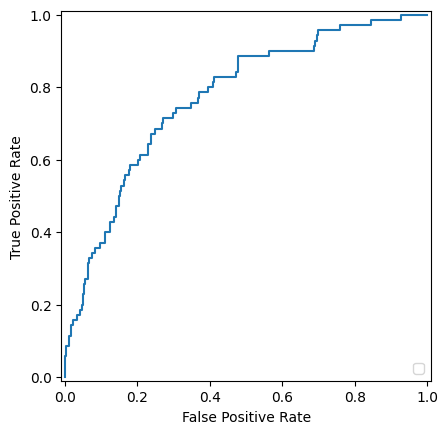

In [144]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Определяем сетку гиперпараметров
lgb_parameters_grid = {
    'lgb__num_leaves': [15, 31, 63],
    'lgb__max_depth': [-1, 5, 10],
    'lgb__learning_rate': [0.01, 0.1, 0.3],
    'lgb__n_estimators': [100, 200, 300, 400]
}

# Настройка GridSearchCV
search_lgb = GridSearchCV(
    pipeline_lgb,
    lgb_parameters_grid,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    return_train_score=True
)

# Обучение модели
search_lgb.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameter (CV score={search_lgb.best_score_:.5f}):")
print(search_lgb.best_params_)

# Устанавливаем лучшие параметры для финальной модели
pipeline_lgb.set_params(**search_lgb.best_params_)

# Обучаем финальную модель
pipeline_lgb.fit(X_train, y_train)

# Прогнозы на валидационных данных
y_val_proba = pipeline_lgb.predict_proba(X_val)[:, 1]

# ROC-кривая и ROC-AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_lgb = thresholds[optimal_idx]

# Рисуем ROC-кривую
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print(f"ROC-AUC = {roc_auc}")
print(f"Оптимальный threshold = {optimal_threshold_lgb}")

print(f"Best parameter (CV score={search_lgb.best_score_:.5f}):")
print(search_lgb.best_params_)


## Подготовим тестовые данные для предсказаний

In [153]:
data_test_finall = pd.read_csv("data/test.csv")
data_test_finall.head()

Deal_id   Deal_date First_deal_date  Secret_dwarf_info_1  \
0  72875713  2016-10-14      2015-09-20                  NaN   
1  75825544  2016-10-23      2015-06-16                  NaN   
2  81809181  2016-11-17      2016-09-11                  NaN   
3  87083256  2016-12-26      2016-06-25                  NaN   
4  84651519  2016-12-07      2016-10-15                  NaN   

   Secret_dwarf_info_2  Secret_dwarf_info_3 First_default_date  \
0                  NaN                  NaN                NaN   
1                  NaN                  NaN                NaN   
2                  NaN                  NaN                NaN   
3                  NaN                  NaN                NaN   
4                  NaN                  NaN                NaN   

   Successful_deals_count             Region  Tavern  Hashed_deal_detail_1  \
0                     0.0  Tavern_district_2       7                   2.5   
1                     6.0  Tavern_district_3      18                   2.5   
2                     0.0  Tavern_district_3       7                   2.5   
3                     0.0  Tavern_district_4       7                   2.5   
4                     0.0  Tavern_district_3       7                   2.5   

   Hashed_deal_detail_2  Hashed_deal_detail_3  Hashed_deal_detail_4  \
0                    -3                    18                   2.5   
1                    -2                    15                   3.5   
2                    -3                     7                   2.5   
3                    -2                     6                   2.5   
4                    -3                     6                   2.5   

   Hashed_deal_detail_5  Hashed_deal_detail_6   Age  Gender  
0                    -3                     5  40.0  Female  
1                    -3                     5  66.0  Female  
2                    -3                     5  36.0  Female  
3                     2                     5  32.0  Female  
4                    -3                     5  37.0  Female

In [154]:
data_test_finall.isna().sum()

Deal_id                     0
Deal_date                   0
First_deal_date             0
Secret_dwarf_info_1       849
Secret_dwarf_info_2       849
Secret_dwarf_info_3       849
First_default_date        849
Successful_deals_count      1
Region                      4
Tavern                      0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Hashed_deal_detail_6        0
Age                         0
Gender                      0
dtype: int64

In [155]:
data_test_finall["Secret_dwarf_info_1"] = data_test_finall["Secret_dwarf_info_1"].fillna(Secret_dwarf_info_1_mode)
data_test_finall["Secret_dwarf_info_2"] = data_test_finall["Secret_dwarf_info_2"].fillna(Secret_dwarf_info_2)
data_test_finall["Secret_dwarf_info_3"] = data_test_finall["Secret_dwarf_info_3"].fillna(Secret_dwarf_info_3)
data_test_finall["Successful_deals_count"] = data_test_finall["Successful_deals_count"].fillna(Successful_deals_count)


data_test_finall["Region"] = data_test_finall["Region"].fillna(data_test_finall["Region"].mode()[0])
data_test_finall = data_test_finall.drop(["Hashed_deal_detail_6"], axis=1)


In [156]:
data_test_finall.isna().sum()

Deal_id                     0
Deal_date                   0
First_deal_date             0
Secret_dwarf_info_1         0
Secret_dwarf_info_2         0
Secret_dwarf_info_3         0
First_default_date        849
Successful_deals_count      0
Region                      0
Tavern                      0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Age                         0
Gender                      0
dtype: int64

In [157]:
data_test_finall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 989 non-null    int64  
 1   Deal_date               989 non-null    object 
 2   First_deal_date         989 non-null    object 
 3   Secret_dwarf_info_1     989 non-null    float64
 4   Secret_dwarf_info_2     989 non-null    float64
 5   Secret_dwarf_info_3     989 non-null    float64
 6   First_default_date      140 non-null    object 
 7   Successful_deals_count  989 non-null    float64
 8   Region                  989 non-null    object 
 9   Tavern                  989 non-null    int64  
 10  Hashed_deal_detail_1    989 non-null    float64
 11  Hashed_deal_detail_2    989 non-null    int64  
 12  Hashed_deal_detail_3    989 non-null    int64  
 13  Hashed_deal_detail_4    989 non-null    float64
 14  Hashed_deal_detail_5    989 non-null    in

In [158]:
data_test_finall['Deal_date'] = pd.to_datetime(data_test_finall['Deal_date'])
data_test_finall['First_deal_date'] = pd.to_datetime(data_test_finall['First_deal_date'])
data_test_finall["First_default_date"] = pd.to_datetime(data_test_finall["First_default_date"])

data_test_finall["was_default"] = data_test_finall['First_default_date'].isna().astype(int)
data_test_finall['First_default_date'] = data_test_finall['First_default_date'].fillna(pd.Timestamp("1970-01-01"))

data_test_finall['my_feature_1'] = (data_test_finall['Deal_date'] - data_test_finall['First_deal_date']).dt.days



data_test_finall["Deal_date_year"] = data_test_finall.Deal_date.dt.year
data_test_finall["Deal_date_month"] = data_test_finall.Deal_date.dt.month
data_test_finall["Deal_date_day"] = data_test_finall.Deal_date.dt.day

data_test_finall["First_deal_date_year"] = data_test_finall.First_deal_date.dt.year
data_test_finall["First_deal_date_month"] = data_test_finall.First_deal_date.dt.month
data_test_finall["First_deal_date_day"] = data_test_finall.First_deal_date.dt.day


data_test_finall["First_default_date_year"] = data_test_finall.First_default_date.dt.year
data_test_finall["First_default_date_month"] = data_test_finall.First_default_date.dt.month
data_test_finall["First_default_date_day"] = data_test_finall.First_default_date.dt.day

data_test_finall = data_test_finall.drop(["Deal_date", "First_deal_date", "First_default_date"], axis=1)

In [159]:
import numpy as np
import pandas as pd

# Определяем категориальные и числовые признаки
cat_cols = data_test_finall.loc[:, data_test_finall.dtypes == "object"].columns
num_cols = data_test_finall.loc[:, data_test_finall.dtypes != "object"].columns

for col in cat_cols:
    if data_test_finall[col].nunique() < 10:
        # One-Hot Encoding для категорий с небольшим количеством уникальных значений
        one_hot_train = pd.get_dummies(data_test_finall[col], prefix=col, drop_first=True)
        data_test_finall = pd.concat((data_test_finall.drop(col, axis=1), one_hot_train), axis=1)
    
    else:
        # Кодируем тестовую выборку без добавления шума
        data_test_finall[col] = data_test_finall[col].map(lambda x: target_mean.get(x, 0))

In [160]:
data_test_finall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Deal_id                   989 non-null    int64  
 1   Secret_dwarf_info_1       989 non-null    float64
 2   Secret_dwarf_info_2       989 non-null    float64
 3   Secret_dwarf_info_3       989 non-null    float64
 4   Successful_deals_count    989 non-null    float64
 5   Tavern                    989 non-null    int64  
 6   Hashed_deal_detail_1      989 non-null    float64
 7   Hashed_deal_detail_2      989 non-null    int64  
 8   Hashed_deal_detail_3      989 non-null    int64  
 9   Hashed_deal_detail_4      989 non-null    float64
 10  Hashed_deal_detail_5      989 non-null    int64  
 11  Age                       989 non-null    float64
 12  was_default               989 non-null    int32  
 13  my_feature_1              989 non-null    int64  
 14  Deal_date_

In [161]:
data_combined = pd.concat([X_train, data_test_finall.drop("Deal_id", axis=1)], axis=0)
data_combined.isna().sum()

Secret_dwarf_info_1           0
Secret_dwarf_info_2           0
Secret_dwarf_info_3           0
Successful_deals_count        0
Tavern                        0
Hashed_deal_detail_1          0
Hashed_deal_detail_2          0
Hashed_deal_detail_3          0
Hashed_deal_detail_4          0
Hashed_deal_detail_5          0
Age                           0
was_default                   0
my_feature_1                  0
Deal_date_year                0
Deal_date_month               0
Deal_date_day                 0
First_deal_date_year          0
First_deal_date_month         0
First_deal_date_day           0
First_default_date_year       0
First_default_date_month      0
First_default_date_day        0
Region_Tavern_district_1      0
Region_Tavern_district_2      0
Region_Tavern_district_3      0
Region_Tavern_district_4      0
Region_Tavern_district_5      0
Region_Tavern_district_6      0
Region_Tavern_district_7      0
Gender_Male                   0
labels                      989
dtype: i

In [162]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Объединяем обучающие и тестовые данные
data_combined = pd.concat([X_train.drop("labels", axis=1), data_test_finall.drop("Deal_id", axis=1)], axis=0)

# Масштабируем объединенные данные
scaler = StandardScaler()
data_combined_scaled = scaler.fit_transform(data_combined)

# Применяем DBSCAN на объединенных данных
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_combined = dbscan.fit_predict(data_combined_scaled)

# Разделяем метки на обучающие и тестовые
labels_train = labels_combined[:len(X_train)]
labels_test = labels_combined[len(X_train):]

# Добавляем метки в тестовый датасет
data_test_finall["labels"] = labels_test


In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 549 to 512
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Secret_dwarf_info_1       2528 non-null   float64
 1   Secret_dwarf_info_2       2528 non-null   float64
 2   Secret_dwarf_info_3       2528 non-null   float64
 3   Successful_deals_count    2528 non-null   float64
 4   Tavern                    2528 non-null   int64  
 5   Hashed_deal_detail_1      2528 non-null   float64
 6   Hashed_deal_detail_2      2528 non-null   int64  
 7   Hashed_deal_detail_3      2528 non-null   int64  
 8   Hashed_deal_detail_4      2528 non-null   float64
 9   Hashed_deal_detail_5      2528 non-null   int64  
 10  Age                       2528 non-null   float64
 11  was_default               2528 non-null   int32  
 12  my_feature_1              2528 non-null   int64  
 13  Deal_date_year            2528 non-null   int32  
 14  Deal_date_mo

In [164]:
data_test_finall.drop("Deal_id", axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Secret_dwarf_info_1       989 non-null    float64
 1   Secret_dwarf_info_2       989 non-null    float64
 2   Secret_dwarf_info_3       989 non-null    float64
 3   Successful_deals_count    989 non-null    float64
 4   Tavern                    989 non-null    int64  
 5   Hashed_deal_detail_1      989 non-null    float64
 6   Hashed_deal_detail_2      989 non-null    int64  
 7   Hashed_deal_detail_3      989 non-null    int64  
 8   Hashed_deal_detail_4      989 non-null    float64
 9   Hashed_deal_detail_5      989 non-null    int64  
 10  Age                       989 non-null    float64
 11  was_default               989 non-null    int32  
 12  my_feature_1              989 non-null    int64  
 13  Deal_date_year            989 non-null    int32  
 14  Deal_date_

## Предсказания на тестовых данных 

In [165]:
#best_pipeline или pipeline_rf
predictions = pipeline_lgb.predict_proba(data_test_finall.drop("Deal_id", axis=1))
predictions_df = data_test_finall[["Deal_id"]].copy()
predictions_df["Prediction"] = predictions[:,1]
predictions_df

Deal_id  Prediction
0    72875713    0.038582
1    75825544    0.041144
2    81809181    0.161880
3    87083256    0.121404
4    84651519    0.162791
..        ...         ...
984  86959667    0.049972
985  77574469    0.338066
986  73676542    0.061971
987  81633790    0.108896
988  78138845    0.075418

[989 rows x 2 columns]

In [166]:
predictions_df.to_csv('data/prediction.csv', index=False)